#### Context / motivation: Want to get the same datasets that were used in parameterizing OpenFF 1.2

Some of these are `OptimizationDataset`s, which we know how to fetch / process, but some are `TorsionDriveDataset`s. Is it convenient to fetch these also?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from typing import Tuple

import qcportal
from openforcefield.topology import Molecule

In [2]:
client = qcportal.FractalClient()
client

FractalClient(server_name='The MolSSI QCArchive Server', address='https://api.qcarchive.molssi.org:443/', username='None')

In [3]:
collections: dict = client.list_collections(aslist=True)
for dataset_type in collections.keys():
    dataset_names = sorted(collections[dataset_type])
    print(f'"{dataset_type}" ({len(dataset_names)} datasets)')
    for i, dataset_name in enumerate(dataset_names):
        print(f'\t{i}: "{dataset_name}"')

"TorsionDriveDataset" (35 datasets)
	0: "Fragment Stability Benchmark"
	1: "Fragmenter paper"
	2: "OpenFF DANCE 1 eMolecules t142 v1.0"
	3: "OpenFF Fragmenter Validation 1.0"
	4: "OpenFF Full TorsionDrive Benchmark 1"
	5: "OpenFF Gen 2 Torsion Set 1 Roche"
	6: "OpenFF Gen 2 Torsion Set 1 Roche 2"
	7: "OpenFF Gen 2 Torsion Set 2 Coverage"
	8: "OpenFF Gen 2 Torsion Set 2 Coverage 2"
	9: "OpenFF Gen 2 Torsion Set 3 Pfizer Discrepancy"
	10: "OpenFF Gen 2 Torsion Set 3 Pfizer Discrepancy 2"
	11: "OpenFF Gen 2 Torsion Set 4 eMolecules Discrepancy"
	12: "OpenFF Gen 2 Torsion Set 4 eMolecules Discrepancy 2"
	13: "OpenFF Gen 2 Torsion Set 5 Bayer"
	14: "OpenFF Gen 2 Torsion Set 5 Bayer 2"
	15: "OpenFF Gen 2 Torsion Set 6 Supplemental"
	16: "OpenFF Gen 2 Torsion Set 6 Supplemental 2"
	17: "OpenFF Group1 Torsions"
	18: "OpenFF Group1 Torsions 2"
	19: "OpenFF Group1 Torsions 3"
	20: "OpenFF Primary Benchmark 1 Torsion Set"
	21: "OpenFF Primary Benchmark 2 Torsion Set"
	22: "OpenFF Primary TorsionD

In [4]:
dataset_type = "TorsionDriveDataset"
dataset_name = "OpenFF Gen 2 Torsion Set 1 Roche 2"

In [5]:
%%time
ds = client.get_collection(dataset_type, dataset_name)

CPU times: user 34 ms, sys: 4.83 ms, total: 38.8 ms
Wall time: 380 ms


In [6]:
specifications = ds.list_specifications(description=False)
specifications

['default']

In [7]:
specification = specifications[0]

In [8]:
%%time
index = list(ds.df.index)
print(len(index))
print(index[0])

142
c1cn[c:1]([nH]1)[CH2:2][C@H:3]2CCCC[C@@H:4]2O
CPU times: user 216 µs, sys: 65 µs, total: 281 µs
Wall time: 257 µs


In [9]:
record_names = list(ds.data.records)
record_names[:10]

['c1cn[c:1]([nh]1)[ch2:2][c@h:3]2cccc[c@@h:4]2o',
 'c1cc[c:1](cc1)[ch2:2][ch2:3][f:4]',
 '[ch3:1][ch2:4][ch2:3][ch3:2]',
 '[ch3:4][ch2:3][c:2]1([ch2:1]oc1)c',
 '[h:1][ch2:2][c@:3]([h:4])(c1ccccc1)c(=o)n(c)c',
 '[h:1][ch2:2][c:3]([h:4])(c1ccccc1)c2ccccc2',
 '[h:1][ch2:2][c@:3]([h:4])(co)o',
 '[h:1][ch2:2][ch:3]([h:4])s(=o)(=o)c1ccccc1',
 '[h:4][ch2:3][c:2]1(cc[nh2+]c[ch2:1]1)c2ccccc2',
 '[h:4][ch2:2][ch2:3][ch2:1]c']

In [10]:
i = 0
record_name = record_names[i]
ind = index[i]
record_name, ind

('c1cn[c:1]([nh]1)[ch2:2][c@h:3]2cccc[c@@h:4]2o',
 'c1cn[c:1]([nH]1)[CH2:2][C@H:3]2CCCC[C@@H:4]2O')

In [11]:
record = ds.get_record(record_name, specification)

In [12]:
record

TorsionDriveRecord(id='18535804', status='COMPLETE')

In [13]:
record.status

<RecordStatusEnum.complete: 'COMPLETE'>

In [17]:
initial_mol = record.get_initial_molecule()

AttributeError: 'TorsionDriveRecord' object has no attribute 'get_initial_molecule'

In [18]:
print(dir(record))

['Config', '__abstractmethods__', '__annotations__', '__base_doc__', '__class__', '__config__', '__custom_root_type__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__field_defaults__', '__fields__', '__fields_set__', '__format__', '__ge__', '__get_validators__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__json_encoder__', '__le__', '__lt__', '__model_autodoc_applied__', '__module__', '__ne__', '__new__', '__post_root_validators__', '__pre_root_validators__', '__pretty__', '__reduce__', '__reduce_ex__', '__repr__', '__repr_args__', '__repr_name__', '__repr_str__', '__schema_cache__', '__setattr__', '__setstate__', '__signature__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__validators__', '__values__', '__weakref__', '_abc_impl', '_calculate_keys', '_decompose_class', '_deserialize_key', '_get_min_optimization_map', '_get_value', '_hash_indices', '_iter', '_kvstore_getter', '_organize_return',

In [19]:
record.provenance

Provenance(creator='torsiondrive', version='v0.9.8.1', routine='torsiondrive.td_api')

In [20]:
final_energies = record.get_final_energies()
final_molecules = record.get_final_molecules()
final_results = record.get_final_results()

In [21]:
final_energies.keys() == final_molecules.keys()

True

In [22]:
final_results.keys() == final_molecules.keys()

True

In [23]:
keys = list(final_energies.keys())
keys

[(-150,),
 (-75,),
 (60,),
 (180,),
 (-165,),
 (-135,),
 (-90,),
 (-60,),
 (45,),
 (75,),
 (165,),
 (-120,),
 (-105,),
 (-45,),
 (30,),
 (90,),
 (150,),
 (-30,),
 (15,),
 (105,),
 (135,),
 (-15,),
 (0,),
 (120,)]

In [24]:
x = [k[0] for k in keys]
y = [final_energies[k] for k in keys]

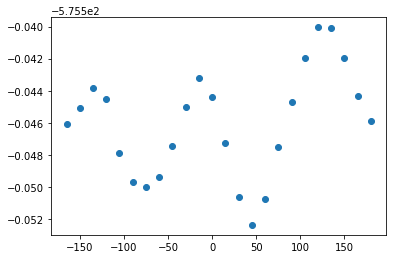

In [25]:
plt.scatter(x, y)

In [26]:
mol = final_molecules[keys[0]]

In [27]:
type(mol)

qcelemental.models.molecule.Molecule

In [28]:
mol.geometry

array([[ 3.16710035e+00, -9.32453356e+00, -8.74749154e+00],
       [ 5.72646018e+00, -8.87475877e+00, -8.78438294e+00],
       [ 3.60147028e+00, -5.40764409e+00, -7.65543193e+00],
       [-9.36689670e-01, -2.59055437e+00, -7.49968210e-01],
       [-2.20125271e+00, -9.58567000e-03, -1.13320759e+00],
       [ 1.39839392e+00, -2.86150333e+00, -2.44373730e+00],
       [-2.83980598e+00,  4.36763330e-01, -3.92750236e+00],
       [ 7.77732090e-01, -2.40456245e+00, -5.24382665e+00],
       [-5.13392630e-01,  1.67922940e-01, -5.63001259e+00],
       [ 3.12312084e+00, -2.70665381e+00, -6.93711401e+00],
       [ 1.86901848e+00, -7.16902797e+00, -8.04428927e+00],
       [ 5.97686923e+00, -6.36415088e+00, -8.07440436e+00],
       [-1.14465808e+00,  6.00972940e-01, -8.23242801e+00],
       [ 2.18778814e+00, -1.10682333e+01, -9.17677629e+00],
       [ 7.33519823e+00, -1.00561011e+01, -9.21584801e+00],
       [-4.10524910e-01, -2.84772592e+00,  1.23730658e+00],
       [-2.29043030e+00, -4.09532665e+00

In [29]:
result = final_results[keys[0]]
result

ResultRecord(id='18785714', status='COMPLETE')

In [30]:
def get_energy_and_gradient(snapshot: qcportal.models.records.ResultRecord) -> Tuple[float, np.ndarray]:
    """Note: force = - gradient"""
    d = snapshot.dict()
    qcvars = d['extras']['qcvars']
    energy = qcvars['CURRENT ENERGY']
    flat_gradient = np.array(qcvars['CURRENT GRADIENT'])
    num_atoms = len(flat_gradient) // 3
    gradient = flat_gradient.reshape((num_atoms, 3))
    return energy, gradient

In [31]:
e, g = get_energy_and_gradient(result)

(array([ 2.,  1., 10., 16., 27., 15.,  4.,  0.,  2., 10.]),
 array([-6.73544161, -6.33810022, -5.94075883, -5.54341744, -5.14607605,
        -4.74873466, -4.35139328, -3.95405189, -3.5567105 , -3.15936911,
        -2.76202772]),
 <BarContainer object of 10 artists>)

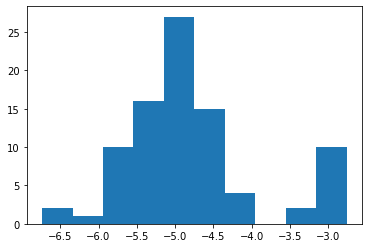

In [32]:
plt.hist(np.log10(np.abs(g.flatten())))

### Try to get offmol from qcmol

#### Attempt 1: `from_dict`

In [33]:
Molecule.from_dict(mol.dict())

KeyError: 'atoms'

#### Attempt 2: `from_qcschema` using `mol.schema()`

In [34]:
Molecule.from_qcschema(mol.schema())

KeyError: 'The record must contain the hydrogen mapped smiles to be safely made from the archive.'

#### What's in `mol.identifiers`?

In [35]:
mol.identifiers

Identifiers(molecule_hash='730a61c2ef2c4298e4a7606f85031b2d6ae174ce', molecular_formula='C10H16N2O', smiles=None, inchi=None, inchikey=None, canonical_explicit_hydrogen_smiles=None, canonical_isomeric_explicit_hydrogen_mapped_smiles=None, canonical_isomeric_explicit_hydrogen_smiles=None, canonical_isomeric_smiles=None, canonical_smiles=None, pubchem_cid=None, pubchem_sid=None, pubchem_conformerid=None)

Okay, can't use that

#### Attempt 4 (successful): `from_qcschema` but using `ds.get_entry` rather than `mol`

In [36]:
print(ind)
entry = ds.get_entry(ind)
print(entry)

c1cn[c:1]([nH]1)[CH2:2][C@H:3]2CCCC[C@@H:4]2O
TDEntry(name='c1cn[c:1]([nH]1)[CH2:2][C@H:3]2CCCC[C@@H:4]2O', initial_molecules={'12213455', '12213449', '12213450', '12213451', '12213456', '12213453', '12213454', '12213448', '12213452'}, td_keywords=TDKeywords(dihedrals=[(2, 9, 7, 8)], grid_spacing=[15], dihedral_ranges=None, energy_decrease_thresh=None, energy_upper_limit=0.05), attributes={'canonical_explicit_hydrogen_smiles': '[H]c1c(n(c(n1)C([H])([H])C2(C(C(C(C(C2([H])O[H])([H])[H])([H])[H])([H])[H])([H])[H])[H])[H])[H]', 'canonical_isomeric_explicit_hydrogen_mapped_smiles': '[H:14][c:1]1[c:2]([n:12]([c:3]([n:11]1)[C:10]([H:26])([H:27])[C@@:8]2([C@@:9]([C:7]([C:5]([C:4]([C:6]2([H:20])[H:21])([H:16])[H:17])([H:18])[H:19])([H:22])[H:23])([H:25])[O:13][H:29])[H:24])[H:28])[H:15]', 'canonical_isomeric_explicit_hydrogen_smiles': '[H]c1c(n(c(n1)C([H])([H])[C@@]2([C@@](C(C(C(C2([H])[H])([H])[H])([H])[H])([H])[H])([H])O[H])[H])[H])[H]', 'canonical_isomeric_smiles': 'c1cnc([nH]1)C[C@H]2CCCC[C

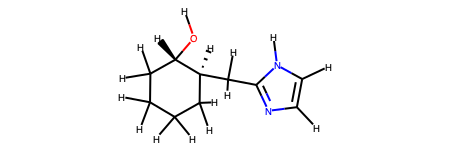

In [37]:
offmol = Molecule.from_qcschema(entry)
offmol

#### Woohoo!

## Putting it all together

Loop over all records, get offmol, get {snapshots, energies, gradients} for each result in record

In [41]:
def fetch_td_record(record: qcportal.models.torsiondrive.TorsionDriveRecord):
    
    final_molecules = record.get_final_molecules()
    final_results = record.get_final_results()
    
    angle_keys = list(final_molecules.keys())
    
    xyzs = []
    energies = []
    gradients = []

    for angle in angle_keys:

        result = final_results[angle]
        mol = final_molecules[angle]

        e, g = get_energy_and_gradient(result)

        xyzs.append(mol.geometry)
        energies.append(e)
        gradients.append(g)
        
    # to arrays
    xyz = np.array(xyzs)
    energies = np.array(energies)
    gradients = np.array(gradients)
        
    # assume each angle key is a tuple -- sort by first angle in tuple
    
    # NOTE: (for now making the assumption that these torsion drives are 1D)
    for k in angle_keys:
        assert(len(k) == 1)
    
    to_ordered = np.argsort([k[0] for k in angle_keys])
    angles_in_order = [angle_keys[i_] for i_ in to_ordered]
    flat_angles = np.array(angles_in_order).flatten()
    
    # put the xyz's, energies, and gradients in the same order as the angles
    xyz_in_order = xyz[to_ordered]
    energies_in_order = energies[to_ordered]
    gradients_in_order = gradients[to_ordered]
    
    # TODO: put this return blob into a better struct
    return flat_angles, xyz_in_order, energies_in_order, gradients_in_order

#### TODO : Also want to know which torsion is being driven

In [42]:
fetch_td_record(record)

(array([-165, -150, -135, -120, -105,  -90,  -75,  -60,  -45,  -30,  -15,
           0,   15,   30,   45,   60,   75,   90,  105,  120,  135,  150,
         165,  180]),
 array([[[  3.33986508,  -9.39546144,  -8.51860834],
         [  5.86914976,  -8.82032371,  -8.3432617 ],
         [  3.49564846,  -5.3761887 ,  -7.78847139],
         ...,
         [  2.32303104,  -1.77205402,  -9.15040804],
         [  7.51176257,  -5.18295726,  -7.63631573],
         [ -2.60339714,  -0.12391245,  -8.65953234]],
 
        [[  3.16710035,  -9.32453356,  -8.74749154],
         [  5.72646018,  -8.87475877,  -8.78438294],
         [  3.60147028,  -5.40764409,  -7.65543193],
         ...,
         [  2.83948084,  -1.60041683,  -8.66584263],
         [  7.61765975,  -5.39819561,  -7.90969428],
         [ -2.28249243,  -0.74259317,  -8.75350778]],
 
        [[  2.92157357,  -8.98546405,  -9.39382618],
         [  5.50544544,  -8.78811289,  -9.19632881],
         [  3.61246295,  -5.30979361,  -7.73885575],
 

In [43]:
from tqdm import tqdm
all_results = dict()
exceptions = dict()

for record_name in tqdm(record_names):
    record = ds.get_record(record_name, specification)
    if record.status == 'COMPLETE':
        all_results[record_name] = fetch_td_record(record)
    else:
        print(f'skipping {record_name}')
        exceptions[record_name] = record

  2%|▏         | 3/142 [00:03<03:13,  1.39s/it]

skipping [ch3:1][ch2:4][ch2:3][ch3:2]


 16%|█▌        | 23/142 [00:32<02:30,  1.27s/it]

skipping [ch3:4][ch2:3][c:2]1[ch:1]ccc(=o)[nh]1


 25%|██▍       | 35/142 [00:49<02:35,  1.45s/it]

skipping cc(=o)[nh:4][ch2:3][c:2]1ncc[n:1]1c


 70%|██████▉   | 99/142 [02:08<00:58,  1.37s/it]

skipping [ch3:1][o:4][ch2:3][ch2:2]o


 94%|█████████▍| 134/142 [02:53<00:09,  1.20s/it]

skipping [h:4][n:3](c1ccccc1)[s:2](=o)(=o)[c:1]2ccccc2


100%|██████████| 142/142 [03:01<00:00,  1.28s/it]

skipping c1cc[c:3]([c:2](c1)[c:1]#[n:4])nc(=o)nc2ccccn2


#### One last thing, making sure I have the offmol

In [45]:
offmols = dict()
for key in all_results:
    offmols[key] = Molecule.from_qcschema(ds.get_entry(key))

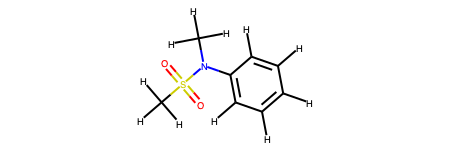

In [46]:
offmols[key]

#### Woohoo!

##### Let's put this whole thing in a function

In [47]:
def fetch_td_dataset(ds, specification='default'):
    record_names = list(ds.data.records)

    all_results = dict()
    skipped = dict()
    exceptions = dict()

    for record_name in tqdm(record_names):
        record = ds.get_record(record_name, specification)
        try:
            if record.status == 'COMPLETE':
                all_results[record_name] = fetch_td_record(record)
            else:
                print(f'skipping {record_name} (status={record.status})')
                exceptions[record_name] = record
        except Exception as e:
            print(f'encountered an unanticipated error on {record_name} : {e}')
    return all_results, skipped, exceptions

#### Nice, that was fast... let's do this also for the other datasets?

In [48]:
dataset_names = [
    "OpenFF Gen 2 Torsion Set 1 Roche 2",
    "OpenFF Gen 2 Torsion Set 2 Coverage 2",
    "OpenFF Gen 2 Torsion Set 3 Pfizer Discrepancy 2",
    "OpenFF Gen 2 Torsion Set 4 eMolecules Discrepancy 2",
    "OpenFF Gen 2 Torsion Set 5 Bayer 2",
    "OpenFF Gen 2 Torsion Set 6 Supplemental 2",
]

In [49]:
datasets = dict()
for name in tqdm(dataset_names):
    datasets[name] = client.get_collection(dataset_type, name)

100%|██████████| 6/6 [00:04<00:00,  1.43it/s]


In [51]:
for name in dataset_names:
    specifications = datasets[name].list_specifications(description=False)
    print(specifications)

['default']
['default']
['default']
['default']
['default']
['default']


Nice! One less thing to worry about looping over

In [52]:
# takes about 30 minutes in total
fetched_datasets = dict()
for name in dataset_names:
    fetched_datasets[name] = fetch_td_dataset(datasets[name])

  1%|▏         | 2/142 [00:03<04:50,  2.07s/it]

skipping [ch3:1][ch2:4][ch2:3][ch3:2] (status=RUNNING)


 16%|█▌        | 23/142 [00:27<01:42,  1.16it/s]

skipping [ch3:4][ch2:3][c:2]1[ch:1]ccc(=o)[nh]1 (status=RUNNING)


 25%|██▌       | 36/142 [00:43<01:42,  1.04it/s]

skipping cc(=o)[nh:4][ch2:3][c:2]1ncc[n:1]1c (status=RUNNING)


 70%|██████▉   | 99/142 [02:13<00:54,  1.27s/it]

skipping [ch3:1][o:4][ch2:3][ch2:2]o (status=RUNNING)


 95%|█████████▌| 135/142 [02:57<00:06,  1.00it/s]

skipping [h:4][n:3](c1ccccc1)[s:2](=o)(=o)[c:1]2ccccc2 (status=RUNNING)


  0%|          | 0/157 [00:00<?, ?it/s]

skipping c1cc[c:3]([c:2](c1)[c:1]#[n:4])nc(=o)nc2ccccn2 (status=ERROR)


 16%|█▌        | 25/157 [00:28<01:55,  1.14it/s]

skipping [ch3:4][c:3]1([c@h:2]2[c@h]1cc[ch2:1]2)o (status=ERROR)
skipping [ch2:1]1n[ch2:4][c@@h:3]2[c@@h:2]1[c@h]2o (status=ERROR)


 50%|█████     | 79/157 [01:54<01:02,  1.24it/s]

skipping cn1ccc[c:1]1[c:2](=s)[n:3]=[p:4](n(c)c)(n(c)c)n(c)c (status=RUNNING)


 56%|█████▌    | 88/157 [02:05<01:10,  1.02s/it]

skipping [ch3:1][ch2:2][o:3][p:4](=o)(n)occ (status=RUNNING)
skipping cc(=c)[c:1]1(cc1)[ch2:2][o:3][nh2:4] (status=RUNNING)


 58%|█████▊    | 91/157 [02:08<00:59,  1.11it/s]

skipping cnc(=o)[nh:4][ch2:3][o:2][ch3:1] (status=RUNNING)


 97%|█████████▋| 153/157 [03:31<00:04,  1.10s/it]

skipping cc(=o)[o:3][c:1]#[c:2][o:4]c(=o)c (status=ERROR)
skipping c[c@@h:3](c1[nh][nh]c(=o)n1)[nh:2][c:1]#[n:4] (status=ERROR)


 99%|█████████▊| 155/157 [03:31<00:01,  1.69it/s]

skipping c1=[n:4][c@h:3](c(=n1)c(=o)n)[n+:2]#[n:1] (status=ERROR)
skipping [ch2:1](c#n)[n:2]=[n+:4]=[n-:3] (status=ERROR)
skipping ccc1cc[c:1](cc1)[n:2]=[s:3]=[o:4] (status=ERROR)


  0%|          | 0/82 [00:00<?, ?it/s]

skipping [ch2:2]=[c:1]=[ch:3][n:4]1cccc1=o (status=ERROR)


 28%|██▊       | 23/82 [00:41<01:10,  1.20s/it]

encountered an unanticipated error on cn1cnc(=o)/[c:4](=[ch:3]/[c:2]2cccc[ch:1]2)/c1=o : list index out of range


 16%|█▌        | 44/272 [01:13<04:16,  1.13s/it]

skipping [h:4][c@@:3]1(cnc(=o)n1)[c:2]2[ch:1]cc(o2)[n+](=o)[o-] (status=RUNNING)


 23%|██▎       | 62/272 [01:42<05:07,  1.46s/it]

skipping coc1ccn[c:4]([ch:3]1)[c:2]2(cc2)[c:1]#n (status=ERROR)


 46%|████▋     | 126/272 [03:30<05:25,  2.23s/it]

skipping [ch:1]1nc2c(=o)[nh]c(nc2[n:2]1[c@h:3]3[ch2:4][c@h](c=c3)co)n (status=RUNNING)


 60%|██████    | 164/272 [04:33<01:44,  1.03it/s]

skipping cc1cc[c:1](cc1)/[n:2]=[ch:3]\[o:4]c (status=ERROR)


 71%|███████   | 192/272 [05:27<02:19,  1.74s/it]

skipping [ch2:1]=[c:2](c(=o)o)[o:3][p:4](=o)(o)o (status=ERROR)


 85%|████████▍ | 230/272 [06:26<01:06,  1.57s/it]

skipping c1cc(c(cc1cl)cl)[ch2:1][s:2](=o)(=o)[c:3]2cnn[nh:4]2 (status=RUNNING)


 87%|████████▋ | 237/272 [06:32<00:28,  1.22it/s]

skipping cn1[c:4](c(c(=o)n(c1=o)c)c#n)[nh:3][n:2]2ccc[ch:1]2 (status=RUNNING)


 99%|█████████▉| 270/272 [07:37<00:01,  1.34it/s]

skipping c1cc(c(cc1cl)[c@@h:3]([ch2:2][c:1]#[n:4])n)[n+](=o)[o-] (status=ERROR)
skipping cco[c:3]1cc(cc[c:2]1[c:1]#[n:4])s(=o)(=o)cl (status=ERROR)


100%|█████████▉| 271/272 [07:37<00:00,  1.55it/s]

skipping cc1c[c:3](ccc1cl)[n:2]=[c:1]=[o:4] (status=ERROR)


  0%|          | 0/219 [00:00<?, ?it/s]

skipping c1cc(c(c[c:3]1[n:2]=[c:1]=[o:4])[n+](=o)[o-])f (status=ERROR)


 25%|██▌       | 55/219 [02:49<07:34,  2.77s/it]

skipping c1c[c:2]([c:1](cc1f)f)[c:3]2(cc2)[ch2:4]n3c(=o)n4c(n3)ccc[c@h]4c(=o)n5cccc5 (status=ERROR)


 58%|█████▊    | 126/219 [05:33<02:30,  1.62s/it]

skipping [h:4][o:3][c:2]1(ccn(cc1)occ)[c:1](=o)occ (status=RUNNING)


 63%|██████▎   | 137/219 [06:06<04:25,  3.24s/it]

skipping c[c:3]([ch3:4])(c)[o:2][c:1](=o)[c@@]12coc[c@@h]1os(=o)(=o)n2c(=o)oc(c)(c)c (status=RUNNING)


 72%|███████▏  | 158/219 [07:06<02:33,  2.52s/it]

skipping cc[ch2:1][o:2][c:3]1[n:4]n(c(=o)n1c)c(=o)ns(=o)(=o)c2c(cccc2occf)c (status=ERROR)


 91%|█████████▏| 200/219 [08:49<00:40,  2.13s/it]

skipping [h:4][nh:3][s:2](=o)(=[o:1])oc1cc2c(cc1oc)[c@h]3cc[c@@]4([c@@h]([c@@h]3cc2)cccc4=o)c (status=ERROR)


 97%|█████████▋| 212/219 [09:15<00:09,  1.35s/it]

skipping c1cc2cc(oc2c[c:3]1[c:1]#[c:2][ch2:4]o)c(=o)n[c@@h]3cn4ccc3cc4 (status=ERROR)
skipping cn1[c@@h]([c@h](cc1=o)c2ccccc2)[c@@h:4]([c:3]#[c:2][c:1]3ccc(cc3)f)o (status=ERROR)
skipping coc(=o)ccc1c(cc[c:3](n1)[c:1]#[c:2][ch2:4]cco)o (status=ERROR)


 99%|█████████▊| 216/219 [09:15<00:02,  1.39it/s]

skipping ccc1c[c:3](cc(c1cc(=o)o)cc)[c:1]#[c:2][ch3:4] (status=ERROR)
skipping cc(c)oc1cc2c(cc1nc3c4[ch:4][c:3]([nh]c4ncn3)[c:2]#[c:1]co)cn[nh]2 (status=ERROR)
skipping coc(=o)[c@@h]1c[c@@h]2c3cccc4c3c(c[nh]4)c[c@h:3]2[n:2](c1)[c:1]#[n:4] (status=ERROR)
skipping cn1[c@@h]([c@h](cc1=o)c2ccccc2)[c@h:3]([c:2]#[c:1]c3ccccc3)[oh:4] (status=ERROR)


  0%|          | 0/22 [00:00<?, ?it/s]

skipping coc(=o)[ch2:4][ch2:3][c:2]#[c:1]c1ccc(c(n1)ccc(=o)oc)o (status=ERROR)
skipping ccc1c[c:3]([ch:4]c(c1cc(=o)o)c)[c:2]#[c:1]c2cc2 (status=ERROR)


 55%|█████▍    | 12/22 [00:14<00:09,  1.06it/s]

skipping [ch2:4](cc(=o)[o+]=c1n=nn=n1)[c:3](=o)[o+:2]=[c:1]2n=nn=n2 (status=ERROR)


100%|██████████| 22/22 [00:31<00:00,  1.45s/it]


In [53]:
len(fetched_datasets)

6

In [54]:
fetched_datasets.keys()

dict_keys(['OpenFF Gen 2 Torsion Set 1 Roche 2', 'OpenFF Gen 2 Torsion Set 2 Coverage 2', 'OpenFF Gen 2 Torsion Set 3 Pfizer Discrepancy 2', 'OpenFF Gen 2 Torsion Set 4 eMolecules Discrepancy 2', 'OpenFF Gen 2 Torsion Set 5 Bayer 2', 'OpenFF Gen 2 Torsion Set 6 Supplemental 2'])

In [55]:
from pickle import dump
with open('torsion_drive_datasets.pkl', 'wb') as f:
    dump(fetched_datasets, f)

#### Finally, grab the offmols...

In [60]:
from typing import Dict

def fetch_offmols(ds) -> Dict[str, Molecule]:
    offmols = dict()
    for record_name in ds.data.records:
        offmols[record_name] = Molecule.from_qcschema(ds.get_entry(record_name))
    return offmols

In [61]:
fetched_offmols = dict()
for name in dataset_names:
    fetched_offmols = fetch_offmols(datasets[name])

In [62]:
with open('torsion_drive_offmols.pkl', 'wb') as f:
    dump(fetched_offmols, f)

#### Take a quick look at some of the records...

Energy and gradient norm vs. angle

In [63]:
all_results = fetched_datasets['OpenFF Gen 2 Torsion Set 1 Roche 2'][0]

In [66]:
key = list(all_results.keys())[0]
key

'c1cn[c:1]([nh]1)[ch2:2][c@h:3]2cccc[c@@h:4]2o'

In [67]:
flat_angles, xyz_in_order, energies_in_order, gradients_in_order = all_results[key]

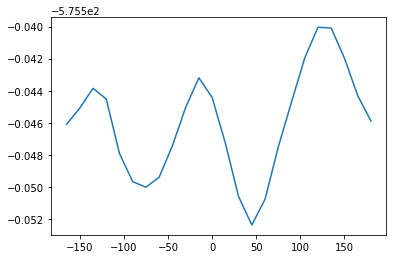

In [68]:
plt.plot(flat_angles, energies_in_order)

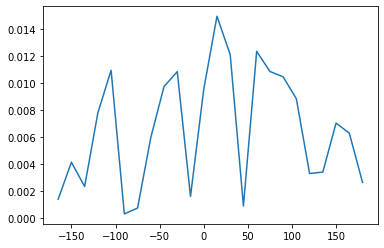

In [69]:
plt.plot(flat_angles, np.linalg.norm(gradients_in_order, axis=(1,2)))

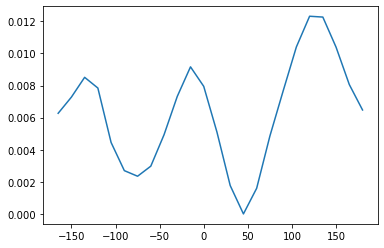

In [70]:
plt.plot(flat_angles, energies_in_order - min(energies_in_order))

In [80]:
from qcelemental import constants
from simtk import unit

angle_unit = unit.degree
report_unit = unit.kilocalorie_per_mole

e_hartree = energies_in_order - min(energies_in_order)
e_kcalmol = e_hartree * constants.hartree2kcalmol

Text(0, 0.5, 'energy (kilocalorie/mole)')

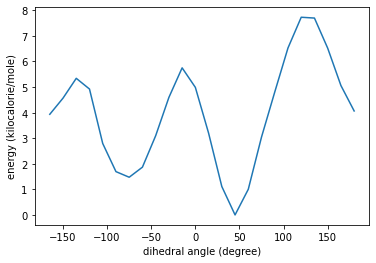

In [81]:
plt.plot(flat_angles, e_kcalmol)
plt.xlabel(f'dihedral angle ({angle_unit})')
plt.ylabel(f'energy ({report_unit})')

Text(0, 0.5, 'energy (kilocalorie/mole)')

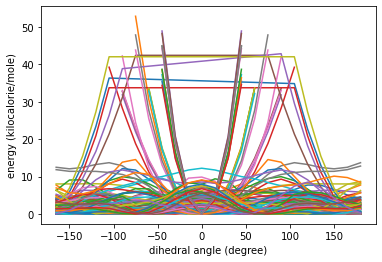

In [82]:
for key in all_results.keys():
    flat_angles, _, energies_in_order, _ = all_results[key]
    
    e_hartree = energies_in_order - min(energies_in_order)
    e_kcalmol = e_hartree * constants.hartree2kcalmol
    plt.plot(flat_angles, e_kcalmol)
plt.xlabel(f'dihedral angle ({angle_unit})')
plt.ylabel(f'energy ({report_unit})')

In [83]:
len(all_results.keys())

136

#### Let's break this up by number of entries, I guess!

In [87]:
td_lengths = sorted(set([len(all_results[key][0]) for key in all_results.keys()]))
td_lengths

[7, 9, 10, 11, 13, 15, 24]

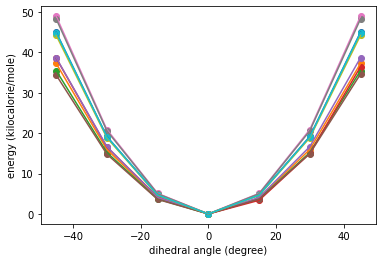

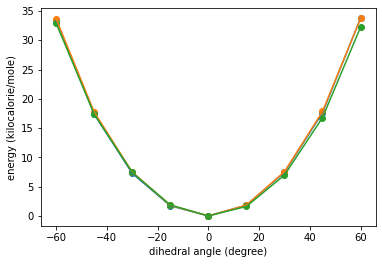

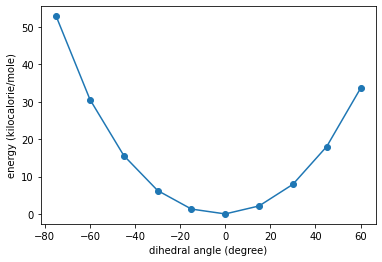

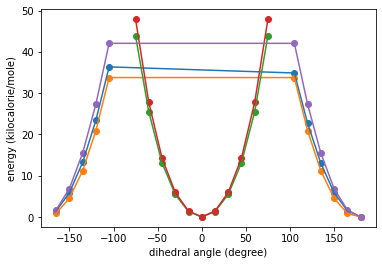

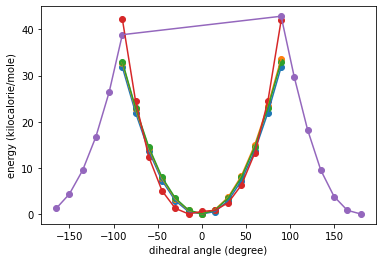

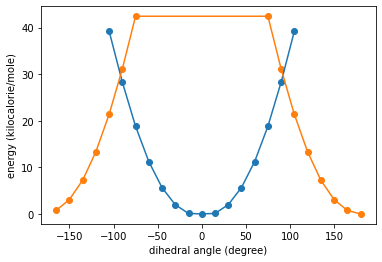

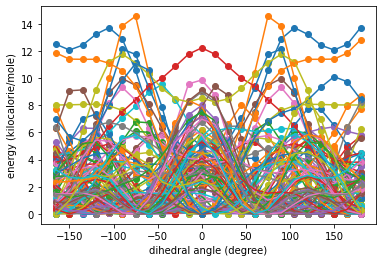

In [91]:
for td_length in td_lengths:
    plt.figure()
    for key in all_results.keys():
        flat_angles, _, energies_in_order, _ = all_results[key]

        e_hartree = energies_in_order - min(energies_in_order)
        e_kcalmol = e_hartree * constants.hartree2kcalmol
        if len(flat_angles) == td_length:
            plt.plot(flat_angles, e_kcalmol)
            # also add markers for the actual datapoints
            plt.scatter(flat_angles, e_kcalmol)
    plt.xlabel(f'dihedral angle ({angle_unit})')
    plt.ylabel(f'energy ({report_unit})')

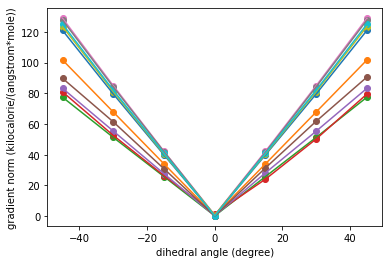

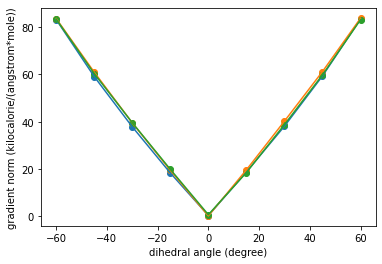

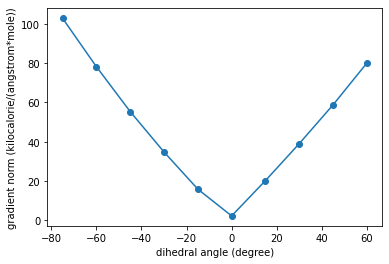

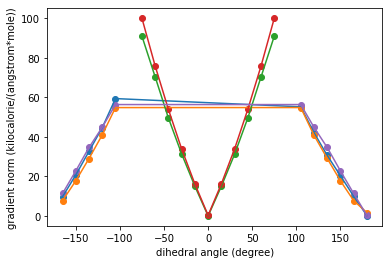

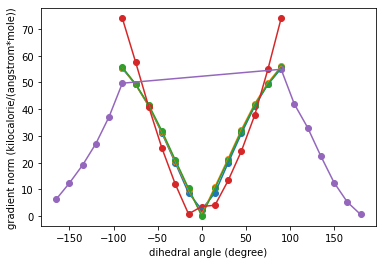

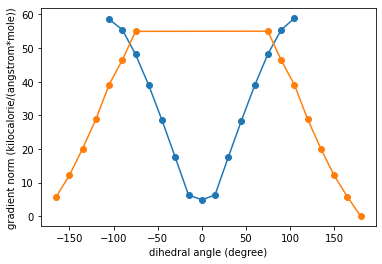

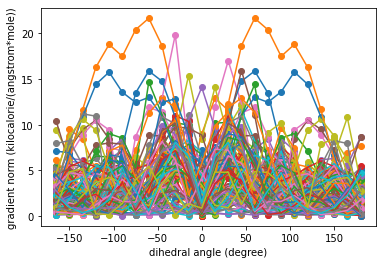

In [92]:
gradient_unit = report_unit / unit.angstrom
for td_length in td_lengths:
    plt.figure()
    for key in all_results.keys():
        flat_angles, _, _, gradients_in_order = all_results[key]

        g_hartree = np.linalg.norm(gradients_in_order, axis=(1,2))
        g_kcalmol = g_hartree * constants.hartree2kcalmol
        if len(flat_angles) == td_length:
            plt.plot(flat_angles, g_kcalmol)
            # also add markers for the actual datapoints
            plt.scatter(flat_angles, g_kcalmol)
    plt.xlabel(f'dihedral angle ({angle_unit})')
    plt.ylabel(f'gradient norm ({gradient_unit})')